In [ ]:
#Name: Ayush Mahadik
#Task: EDA on Terrorism
#Batch: LGMVIP - DataScience (May)
#Details: Below are thr queries preformed using dataset also performed some plottings for better understanding of data

In [ ]:
#importing useful libraries
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
terr_df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding=('ISO-8859-1'), low_memory=False)

In [ ]:

terr_df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84288,200709260007,2007,9,26,NaN,0,NaN,95,Iraq,10,...,NaN,"Kramer, Andrew E. Bombings in Iraq Said to Si...","As feared, bloddshed surges at Ramadan, The ...",Blasts Kill at Least 30 Across Iraq In Growin...,CETIS,-9.0,-9.0,0.0,-9.0,NaN
84289,200709260008,2007,9,26,NaN,0,NaN,95,Iraq,10,...,NaN,"Kramer, Andrew E. Bombings in Iraq Said to Si...","As feared, bloddshed surges at Ramadan, The ...","Iraq rocked by spate of bombs, AFP, Septembe...",CETIS,-9.0,-9.0,0.0,-9.0,NaN
84290,200709260009,2007,9,26,NaN,1,NaN,4,Afghanistan,6,...,NaN,AFP: Danish Soldiers Killed by Taliban Insurg...,AFP: Four Red Cross Staff Kidnapped by Unknow...,NaN,CETIS,-9.0,-9.0,0.0,-9.0,NaN
84291,200709260010,2007,9,26,NaN,0,NaN,195,Sudan,11,...,NaN,"National Counter Terrorism Center, 2007 Report...",NaN,NaN,CETIS,0.0,0.0,0.0,0.0,NaN


In [ ]:
terr_df.shape

(84293, 135)

In [ ]:

terr_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
terr_df.dtypes

eventid         int64
iyear           int64
imonth          int64
iday            int64
approxdate     object
               ...   
INT_LOG       float64
INT_IDEO      float64
INT_MISC      float64
INT_ANY       float64
related        object
Length: 135, dtype: object

In [ ]:

terr_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,8.429300e+04,84293.000000,84293.000000,84293.000000,84293.000000,84293.000000,84293.000000,80340.000000,8.033900e+04,84291.000000,...,8.790000e+02,1.400000e+02,3.350000e+02,135.000000,3091.000000,2536.000000,84292.000000,84292.000000,84292.000000,84292.000000
mean,1.990154e+11,1990.088347,6.397957,15.273890,0.027120,142.926874,6.081312,19.967218,-1.074834e+03,1.439276,...,3.195527e+06,5.211615e+05,6.469001e+05,914.674074,4.092203,-15.175473,-3.952593,-3.908841,0.122598,-3.165401
std,8.793680e+08,8.794529,3.373884,8.826636,0.162433,132.467076,3.177112,23.112599,3.040696e+05,1.090267,...,3.516057e+07,2.338031e+06,3.263448e+06,5849.244339,2.032003,60.969954,4.526669,4.583759,0.764751,4.570697
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.984022e+11,1984.000000,3.000000,8.000000,0.000000,61.000000,3.000000,6.547306,-7.421361e+01,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,1.990041e+11,1990.000000,6.000000,15.000000,0.000000,110.000000,6.000000,24.891115,5.481111e+00,1.000000,...,4.500000e+03,0.000000e+00,0.000000e+00,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.996083e+11,1996.000000,9.000000,23.000000,0.000000,183.000000,9.000000,37.755363,4.437177e+01,1.000000,...,5.000000e+05,0.000000e+00,5.507100e+04,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,2.007093e+11,2007.000000,12.000000,31.000000,1.000000,1003.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,2.000000e+07,4.100000e+07,48000.000000,7.000000,856.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
terr_df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                          'region_txt':'Region','attacktype1_txt':'Attack_Type','target1':'Target','nkill':'Killed',
                          'nwound':'Wounded','gname':'Group','targtype1_txt':'Target_Type',
                          'weaptype1_txt':'Weapon_type','latitude':'Latitude',
                          'longitude':'Longitude','target1':'Target','city':'City'},inplace=True)

In [ ]:
# percentage of missing values in our dataset
missing_values = (((terr_df.isnull().sum()).sum())/terr_df.size)*100
missing_values

60.47133653293121

In [ ]:
# creating dataframe with necessary columns only
terr_df = terr_df[['Year','Month','Day','Country','State','Region','City','Latitude','Longitude','Attack_Type','Killed',
              'Wounded','Group','Target','Target_Type','Weapon_type']]
terr_df.head(10)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0.0,0.0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0.0,0.0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


In [ ]:
for i in terr_df.columns:
    print(i,terr_df[i].nunique())

Year 37
Month 13
Day 32
Country 203
State 2318
Region 12
City 16887
Latitude 15989
Longitude 16005
Attack_Type 9
Killed 166
Wounded 200
Group 2695
Target 51858
Target_Type 22
Weapon_type 12


In [ ]:
terr_df.info()

In [ ]:
terr_df['Wounded'] = terr_df['Wounded'].fillna(0).astype(int)
terr_df['Killed'] = terr_df['Killed'].fillna(0).astype(int)

In [ ]:

terr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84293 entries, 0 to 84292
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         84293 non-null  int64  
 1   Month        84293 non-null  int64  
 2   Day          84293 non-null  int64  
 3   Country      84293 non-null  object 
 4   State        83875 non-null  object 
 5   Region       84293 non-null  object 
 6   City         84219 non-null  object 
 7   Latitude     80340 non-null  float64
 8   Longitude    80339 non-null  float64
 9   Attack_Type  84292 non-null  object 
 10  Killed       84293 non-null  int64  
 11  Wounded      84293 non-null  int64  
 12  Group        84292 non-null  object 
 13  Target       83773 non-null  object 
 14  Target_Type  84292 non-null  object 
 15  Weapon_type  84292 non-null  object 
dtypes: float64(2), int64(5), object(9)
memory usage: 10.3+ MB


In [ ]:
terr_df.head(10)

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,Attack_Type,Killed,Wounded,Group,Target,Target_Type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1,0,MANO-D,Julio Guzman,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0,0,23rd of September Communist League,"Nadine Chaval, daughter",Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1,0,Unknown,Employee,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,0,0,Unknown,U.S. Embassy,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,0,0,Unknown,U.S. Consulate,Government (Diplomatic),Incendiary
5,1970,1,1,United States,Illinois,North America,Cairo,37.005105,-89.176269,Armed Assault,0,0,Black Nationalists,Cairo Police Headquarters,Police,Firearms
6,1970,1,2,Uruguay,Montevideo,South America,Montevideo,-34.891151,-56.187214,Assassination,0,0,Tupamaros (Uruguay),Juan Maria de Lucah/Chief of Directorate of in...,Police,Firearms
7,1970,1,2,United States,California,North America,Oakland,37.791927,-122.225906,Bombing/Explosion,0,0,Unknown,Edes Substation,Utilities,Explosives
8,1970,1,2,United States,Wisconsin,North America,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0,0,New Year's Gang,"R.O.T.C. offices at University of Wisconsin, M...",Military,Incendiary
9,1970,1,3,United States,Wisconsin,North America,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0,0,New Year's Gang,Selective Service Headquarters in Madison Wisc...,Government (General),Incendiary


In [ ]:
terr_df['Attack_Type'].value_counts()

Bombing/Explosion                      36949
Armed Assault                          20085
Assassination                          13323
Facility/Infrastructure Attack          5344
Hostage Taking (Kidnapping)             4090
Unknown                                 2929
Hostage Taking (Barricade Incident)      652
Unarmed Assault                          532
Hijacking                                388
Name: Attack_Type, dtype: int64

In [ ]:

(terr_df['Attack_Type'].value_counts()/terr_df.shape[0])*100

Bombing/Explosion                      43.834008
Armed Assault                          23.827601
Assassination                          15.805583
Facility/Infrastructure Attack          6.339791
Hostage Taking (Kidnapping)             4.852123
Unknown                                 3.474784
Hostage Taking (Barricade Incident)     0.773492
Unarmed Assault                         0.631132
Hijacking                               0.460299
Name: Attack_Type, dtype: float64

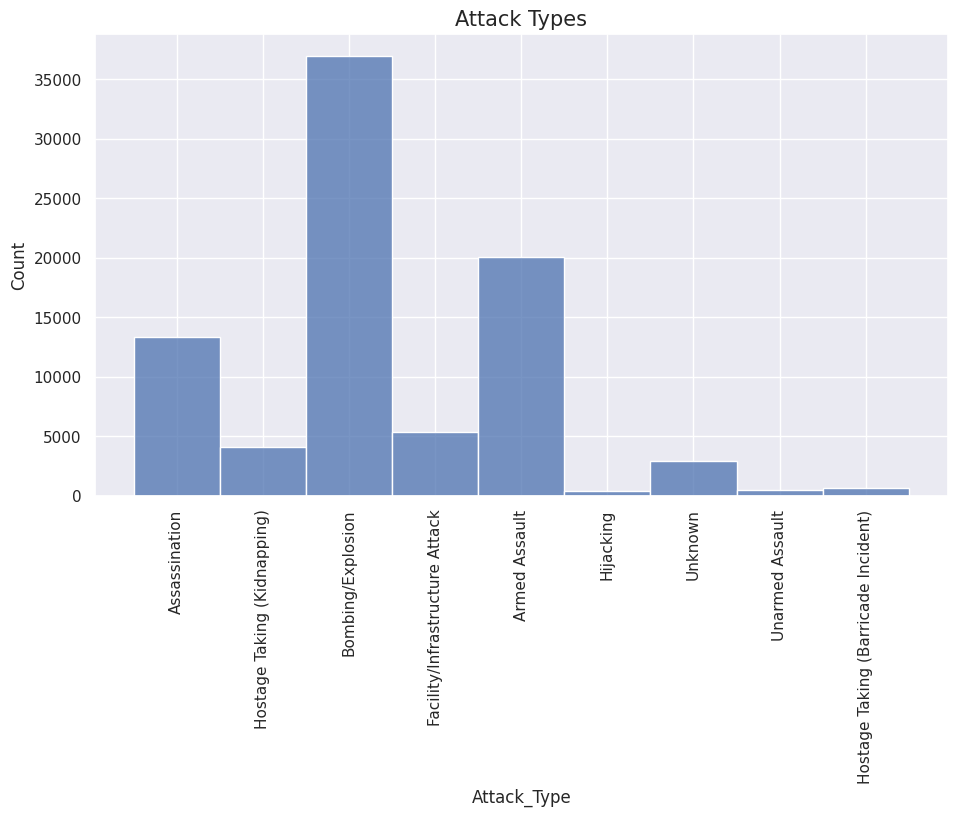

In [ ]:
# 10 most attacked targets

plt.figure(figsize = (11,6))
sns.histplot(terr_df['Attack_Type'], palette='cubehelix')
plt.title('Attack Types',fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:

terr_df.Country.value_counts()[:10]

Colombia          6933
Peru              6040
El Salvador       5320
United Kingdom    4429
India             4361
Spain             3167
Sri Lanka         2758
Turkey            2699
Iraq              2696
United States     2542
Name: Country, dtype: int64

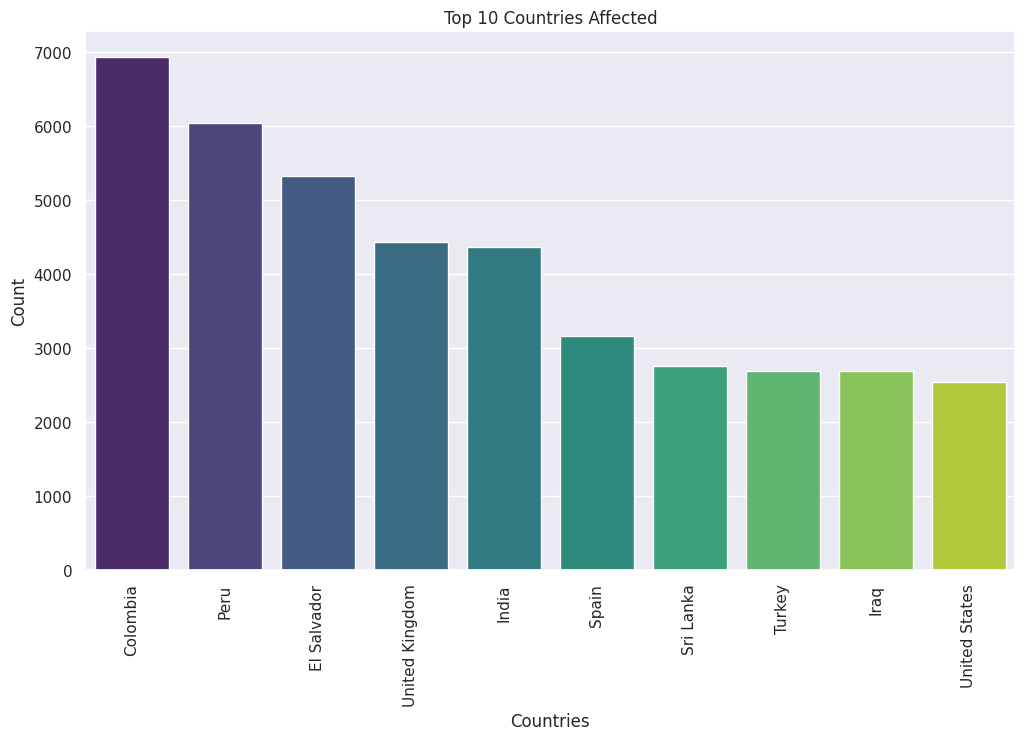

In [ ]:
plt.figure(figsize=(12,7))
sns.barplot(x=terr_df['Country'].value_counts()[:10].index,y=terr_df['Country'].value_counts()[:10].values,palette='viridis')
plt.title('Top 10 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [ ]:
(terr_df['Target_Type'].value_counts().head(10)/terr_df['Target_Type'].shape[0])*10

Private Citizens & Property       2.014165
Business                          1.553866
Military                          1.320276
Government (General)              1.310073
Police                            1.188948
Transportation                    0.512617
Utilities                         0.475010
Government (Diplomatic)           0.307024
Religious Figures/Institutions    0.222676
Journalists & Media               0.211880
Name: Target_Type, dtype: float64

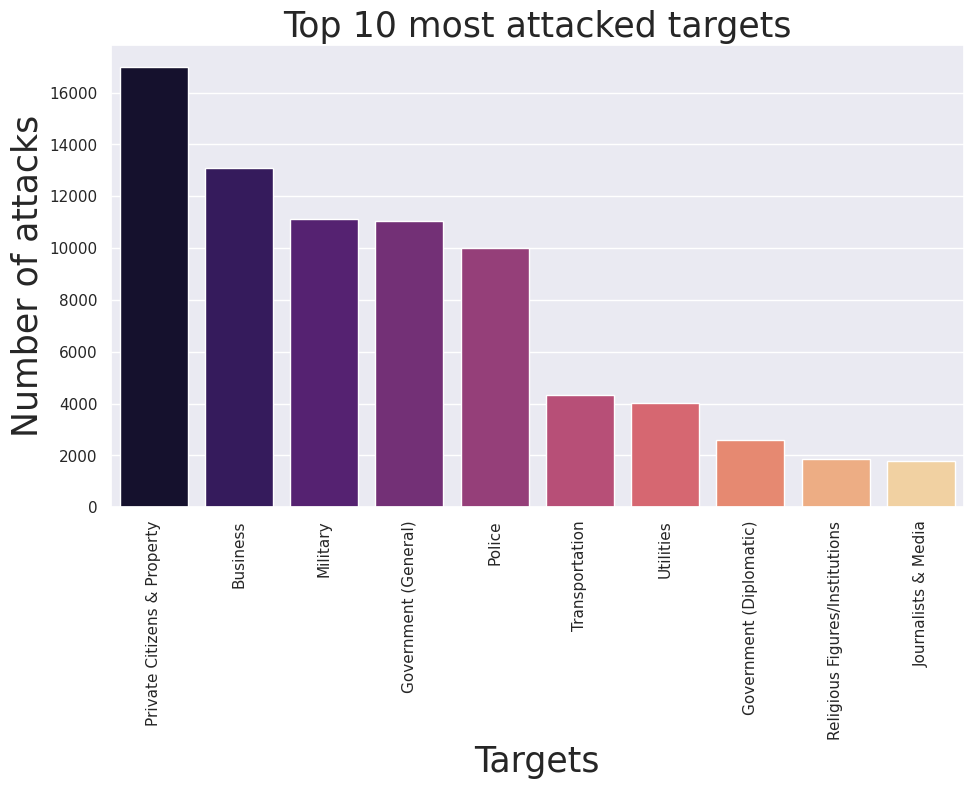

In [ ]:
# 10 most attacked targets
plt.figure(figsize = (11,6))
sns.barplot(x=terr_df['Target_Type'].value_counts().head(10).index, y=terr_df['Target_Type'].value_counts().head(10).values, 
            palette='magma')
plt.title('Top 10 most attacked targets',fontsize=25)
plt.xlabel('Targets',fontsize=25)
plt.ylabel('Number of attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

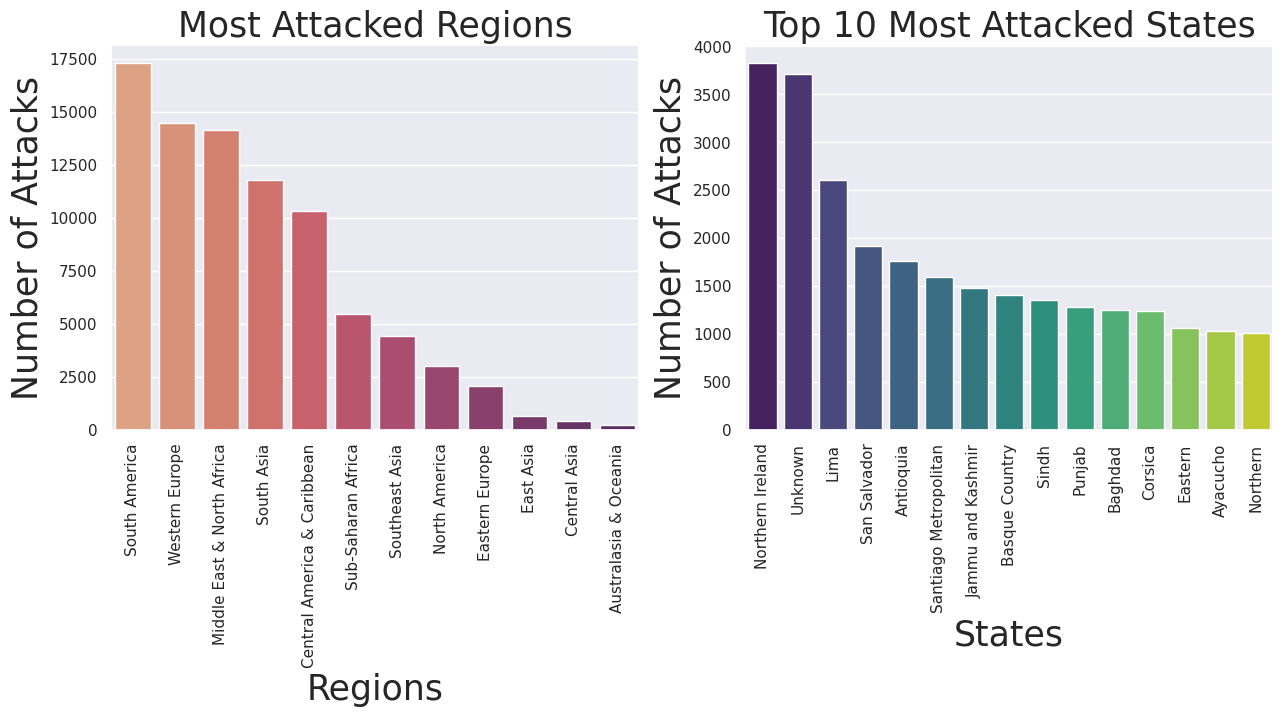

In [ ]:
plt.subplot(1,2,1)
# regions with most attacks 
sns.barplot(x=terr_df['Region'].value_counts().index, y=terr_df['Region'].value_counts().values,palette='flare')
plt.title('Most Attacked Regions',fontsize=25)
plt.xlabel('Regions',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=terr_df['State'].value_counts().head(15).index, y=terr_df['State'].value_counts().head(15).values,palette='viridis')
plt.title('Top 10 Most Attacked States',fontsize=25)
plt.xlabel('States',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

In [ ]:
(terr_df['Weapon_type'].value_counts().head()/terr_df['Weapon_type'].shape[0])*100

Explosives    44.204145
Firearms      36.547519
Unknown        8.737380
Incendiary     7.864235
Melee          2.191167
Name: Weapon_type, dtype: float64

Text(0, 0.5, 'Number of Weapon Used')

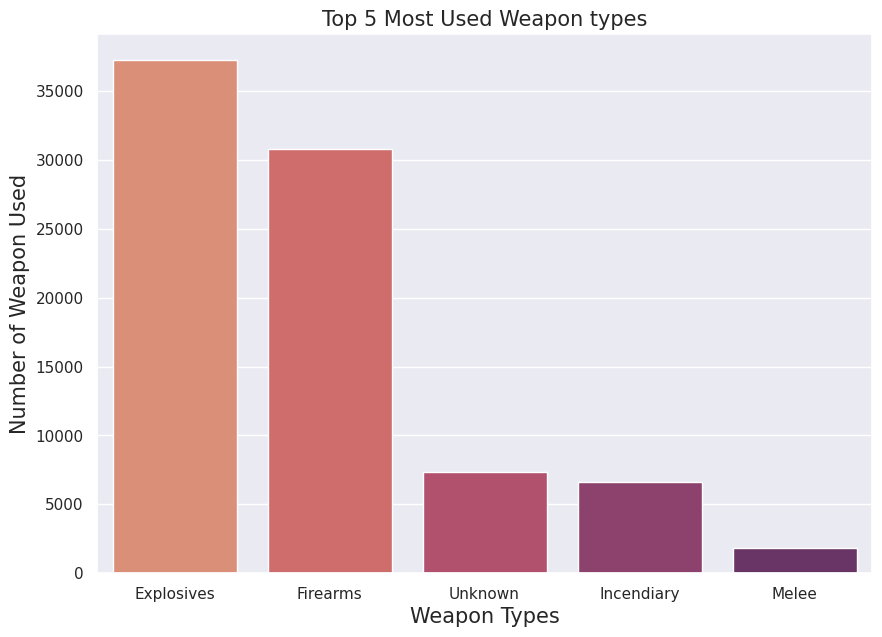

In [ ]:

# Top 5 most used weapons types in terror attacks
plt.figure(figsize=(10,7))
sns.barplot(x=terr_df['Weapon_type'].value_counts().head().index, y=terr_df['Weapon_type'].value_counts().head().values,palette='flare')
plt.title('Top 5 Most Used Weapon types',fontsize=15)
plt.xlabel('Weapon Types',fontsize=15)
plt.ylabel('Number of Weapon Used',fontsize=15)

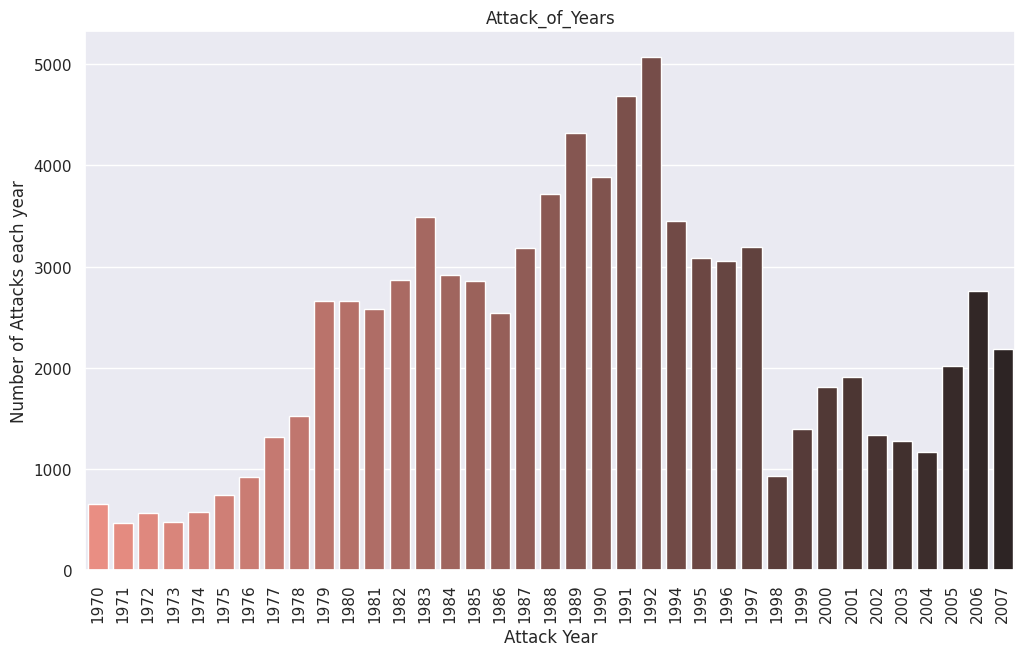

In [ ]:
x_year = terr_df['Year'].unique()
y_count_years = terr_df['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (12,7))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'dark:salmon_r')
plt.xticks(rotation = 90)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

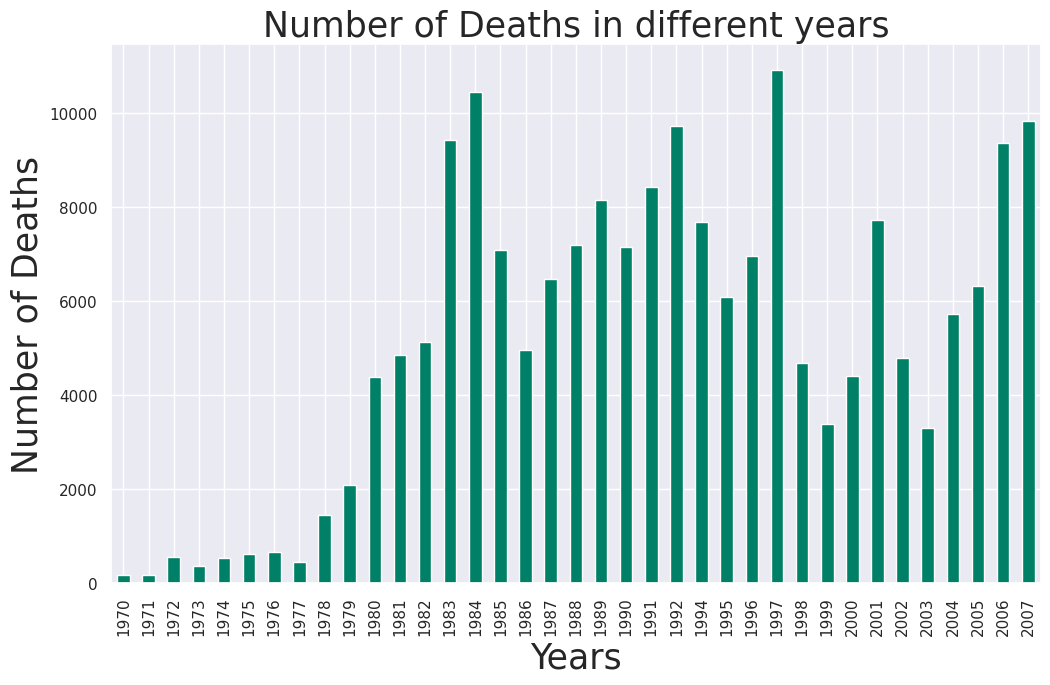

In [ ]:
plt.figure(figsize = (12,7))
terr_df.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='summer')
plt.title('Number of Deaths in different years',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Number of Deaths',fontsize=25)
plt.xticks(rotation=90)
plt.show()

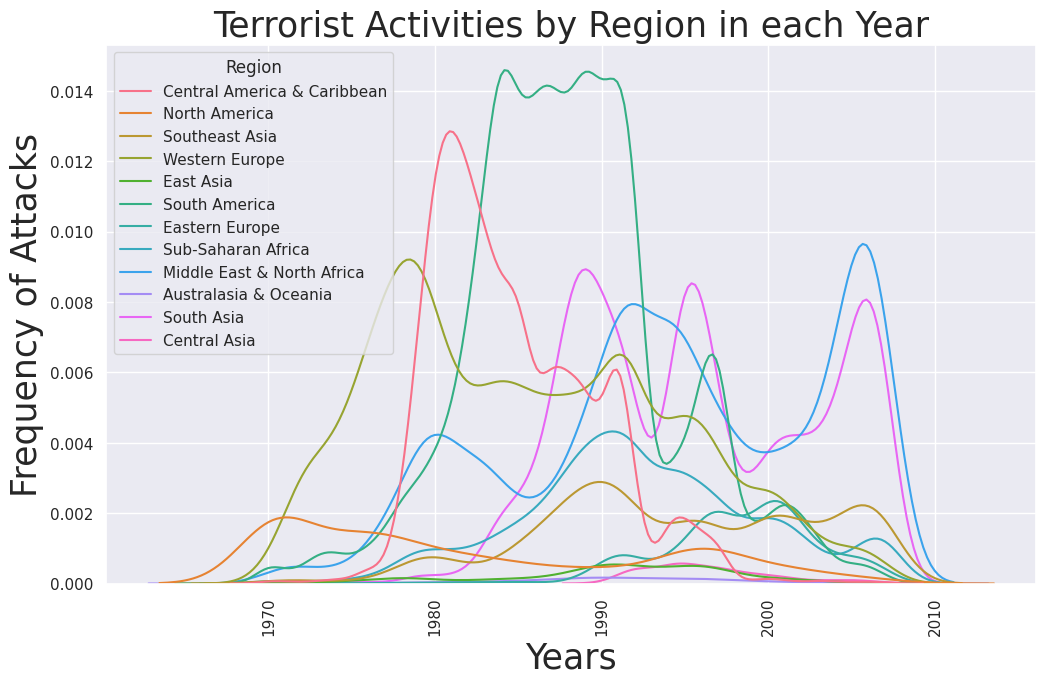

In [ ]:
plt.figure(figsize = (12,7))
sns.kdeplot(x=terr_df['Year'], hue = terr_df['Region'])
plt.title('Terrorist Activities by Region in each Year',fontsize=25)
plt.xlabel('Years',fontsize=25)
plt.ylabel('Frequency of Attacks',fontsize=25)
plt.xticks(rotation=90)
plt.show()

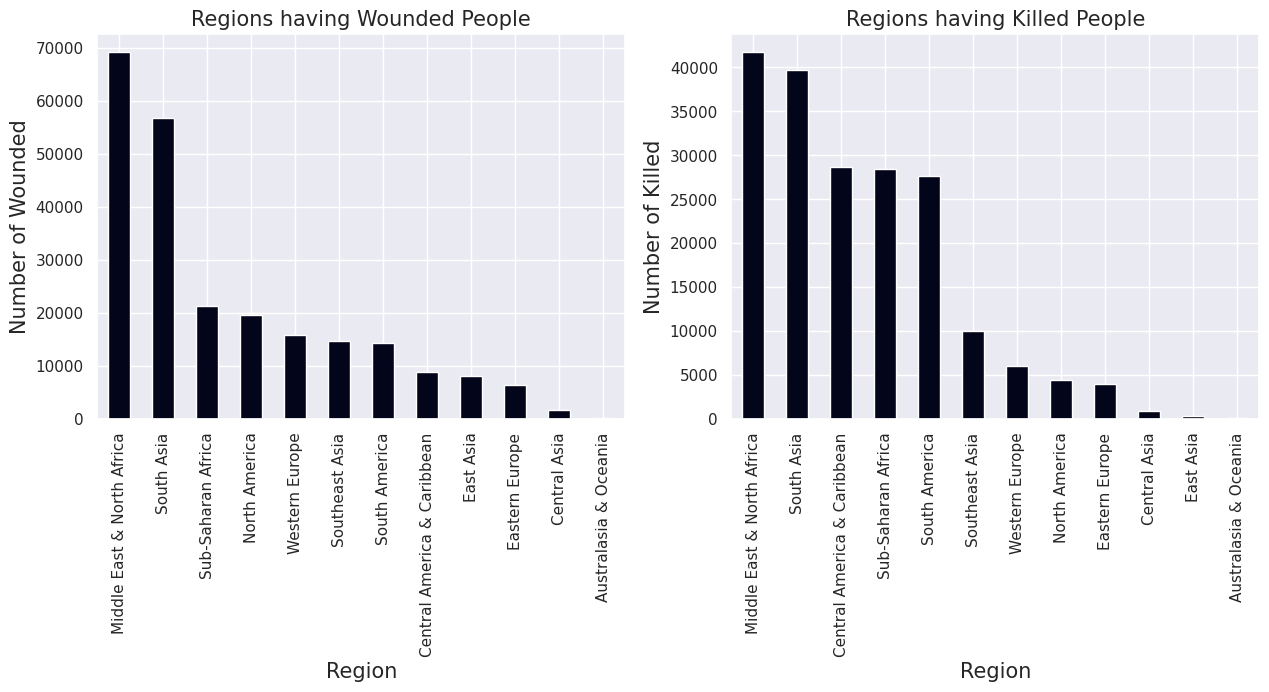

In [ ]:
plt.subplot(1,2,1)

terr_df.groupby(['Region'])['Wounded'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Wounded People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
terr_df.groupby(['Region'])['Killed'].sum().sort_values(ascending = False).plot(kind='bar',colormap='rocket')
plt.title('Regions having Killed People',fontsize=15)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

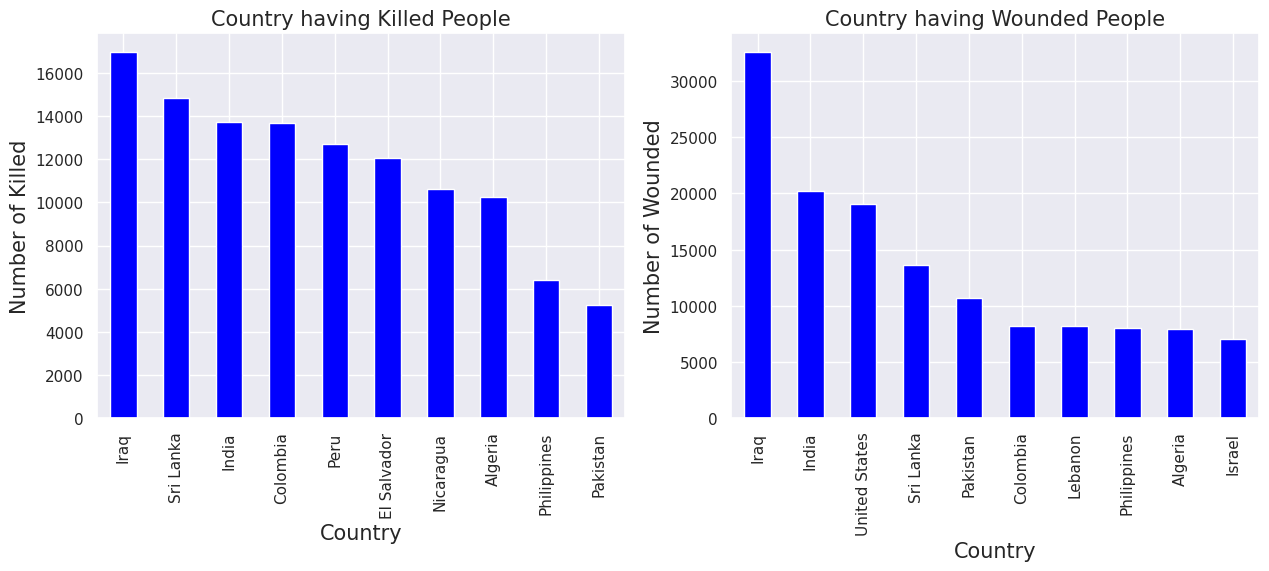

In [ ]:
plt.subplot(1,2,2)

df1=terr_df.groupby(['Country'])['Wounded'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Wounded People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Wounded',fontsize=15)
plt.xticks(rotation=90)

plt.subplot(1,2,1)
terr_df.groupby(['Country'])['Killed'].sum().sort_values(ascending = False).head(10).plot(kind='bar',colormap='winter')
plt.title('Country having Killed People',fontsize=15)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Number of Killed',fontsize=15)
plt.xticks(rotation=90)
plt.gcf().set_size_inches(15, 5)

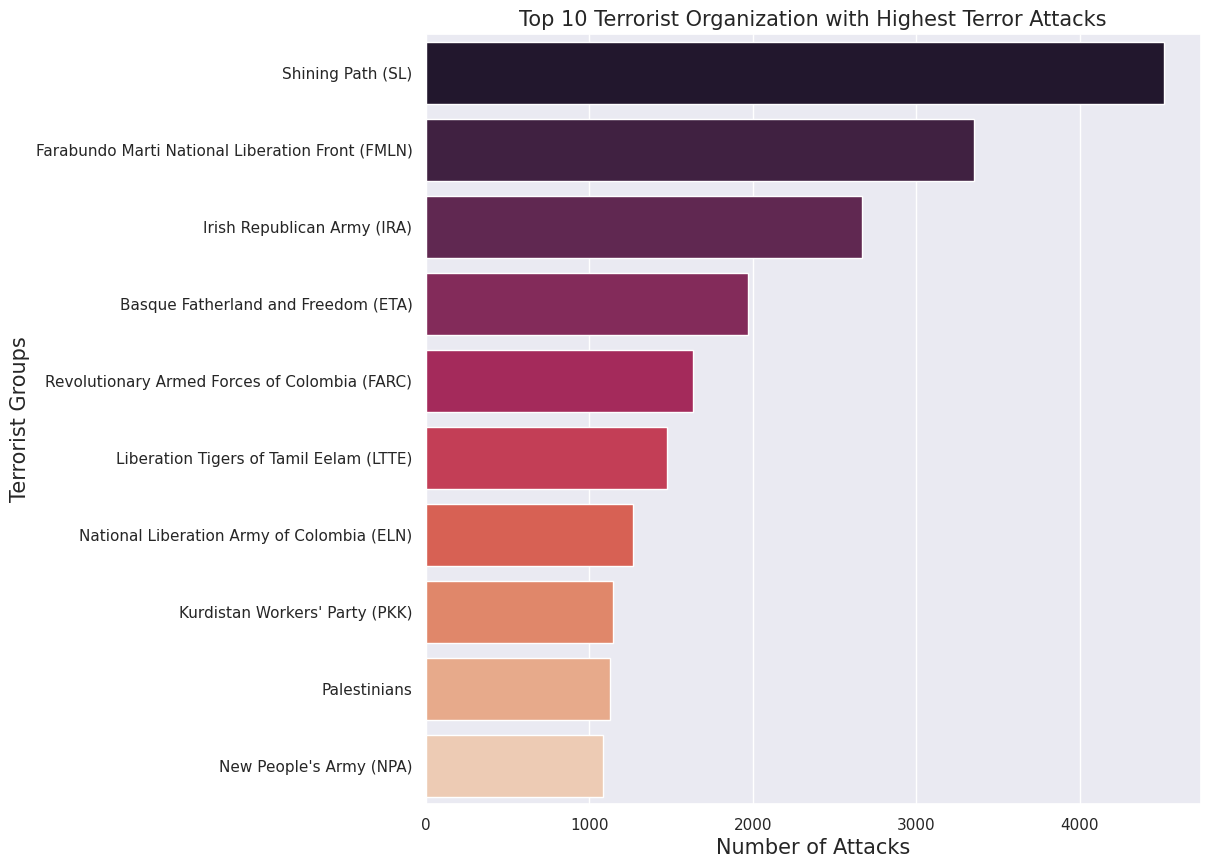

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=terr_df['Group'].value_counts()[1:11].values, y=terr_df['Group'].value_counts()[1:11].index,palette='rocket')
plt.title('Top 10 Terrorist Organization with Highest Terror Attacks',fontsize=15)
plt.xlabel('Number of Attacks',fontsize=15)
plt.ylabel('Terrorist Groups',fontsize=15)
plt.show()

In [ ]:
terr_df_tal = terr_df[terr_df.Group == 'Taliban']

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '1995'),
  Text(1, 0, '2001'),
  Text(2, 0, '2002'),
  Text(3, 0, '2003'),
  Text(4, 0, '2004'),
  Text(5, 0, '2005'),
  Text(6, 0, '2006'),
  Text(7, 0, '2007')])

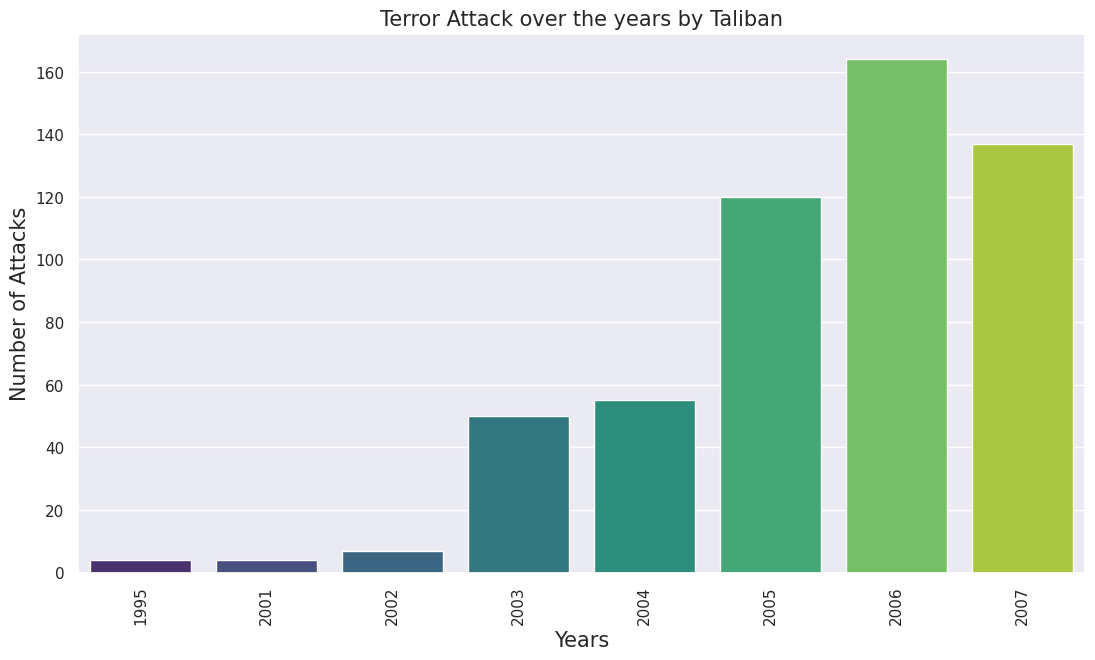

In [ ]:
# Terror Attacks by Taliban over the Years
plt.figure(figsize = (13,7))
sns.barplot(x=terr_df_tal['Year'].value_counts().index,y=terr_df_tal['Year'].value_counts().values, palette = 'viridis')
plt.title('Terror Attack over the years by Taliban',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.xticks(rotation= 90)

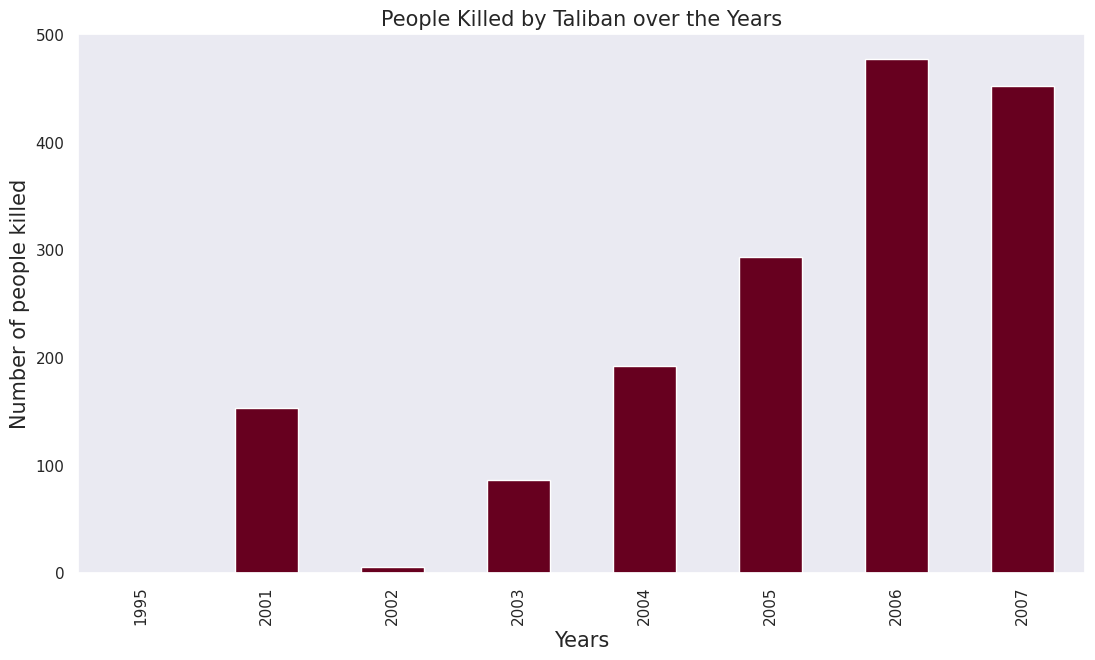

In [ ]:
plt.figure(figsize=(13,7))
terr_df_tal.groupby(['Year'])['Killed'].sum().plot(kind='bar',colormap='RdBu')
plt.title('People Killed by Taliban over the Years',fontsize=15)
plt.xlabel('Years',fontsize=15)
plt.ylabel('Number of people killed',fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.show()